<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 AAPL Analysis
  </h1>
</div>

In [354]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [355]:
import warnings

## 🧱 1. Setup & Imports

In [356]:
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from data.load_data import load_local_data

In [357]:
# variables
TICKER= 'AAPL'
RAW_DATA_PATH='../../data/raw/yfinance_data/AAPL_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/AAPL_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [358]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/AAPL_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (10998, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


### Dataset Overview

In [359]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
7532,2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365532,721624400,0.0,0.0
8885,2016-03-08,25.195000,25.440001,25.100000,25.257500,23.031628,126247600,0.0,0.0
9266,2017-09-11,40.125000,40.512501,39.972500,40.375000,37.898605,126323200,0.0,0.0
8489,2014-08-11,23.817499,24.020000,23.709999,23.997499,21.307558,146340000,0.0,0.0
9732,2019-07-19,51.447498,51.625000,50.590000,50.647499,48.823246,83717200,0.0,0.0
7132,2009-03-20,3.646071,3.682500,3.591786,3.628214,3.063937,695587200,0.0,0.0
1419,1986-07-25,0.147879,0.151786,0.147321,0.151786,0.117012,217459200,0.0,0.0
8761,2015-09-09,28.440001,28.504999,27.442499,27.537500,24.868725,340043200,0.0,0.0
6839,2008-01-22,5.287857,5.713571,5.214286,5.558571,4.694077,2434754000,0.0,0.0
661,1983-07-26,0.192522,0.193638,0.167411,0.174665,0.134649,268979200,0.0,0.0


In [360]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0


In [361]:
#shape of the dataset
df.shape

(10998, 9)

In [362]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [363]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10998.0,2.229916e+01,4.600368e+01,0.049665,2.991070e-01,5.312500e-01,2.020420e+01,2.364800e+02
High,10998.0,2.253906e+01,4.649603e+01,0.049665,3.037105e-01,5.379460e-01,2.038955e+01,2.372300e+02
Low,10998.0,2.206837e+01,4.554093e+01,0.049107,2.901790e-01,5.223210e-01,1.999804e+01,2.330900e+02
Close,10998.0,2.231275e+01,4.603766e+01,0.049107,2.985490e-01,5.312500e-01,2.019616e+01,2.348200e+02
Adj Close,10998.0,2.149450e+01,4.556192e+01,0.037857,2.418399e-01,4.320787e-01,1.725303e+01,2.345485e+02
Volume,10998.0,3.180806e+08,3.354523e+08,0.000000,1.132545e+08,2.057412e+08,3.985275e+08,7.421641e+09
Dividends,10998.0,7.522790e-04,1.175308e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01
Stock Splits,10998.0,1.545736e-03,8.366313e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00


In [364]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,10998,10998,1980-12-12,1


In [365]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [366]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            10998
Volume          10434
Adj Close        7990
Close            6414
Open             6305
High             6249
Low              6237
Dividends          19
Stock Splits        4
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [367]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [368]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [369]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [370]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [371]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [372]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [373]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [374]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 10998/10998 (0 became NaT)


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          10998 non-null  datetime64[ns, UTC]
 1   Open          10998 non-null  float64            
 2   High          10998 non-null  float64            
 3   Low           10998 non-null  float64            
 4   Close         10998 non-null  float64            
 5   Adj Close     10998 non-null  float64            
 6   Volume        10998 non-null  int64              
 7   Dividends     10998 non-null  float64            
 8   Stock Splits  10998 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 773.4 KB


In [376]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [377]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
8994,2016-08-11 00:00:00+00:00,27.129999,27.232500,26.962500,26.982500,24.888508,109938000,0.000000,0.0
8110,2013-02-07 00:00:00+00:00,16.544643,16.785713,16.218571,16.722143,14.329873,704580800,0.094643,0.0
3988,1996-09-20 00:00:00+00:00,0.208705,0.209821,0.203125,0.204241,0.172476,149150400,0.000000,0.0
6919,2008-05-15 00:00:00+00:00,6.671786,6.782143,6.578571,6.776071,5.722223,873208000,0.000000,0.0
2251,1989-11-07 00:00:00+00:00,0.386161,0.397321,0.386161,0.392857,0.309208,151323200,0.000000,0.0
6699,2007-07-02 00:00:00+00:00,4.323214,4.360357,4.260714,4.330714,3.657181,994862400,0.000000,0.0
2476,1990-09-28 00:00:00+00:00,0.254464,0.258929,0.243304,0.258929,0.206147,176041600,0.000000,0.0
5334,2002-01-29 00:00:00+00:00,0.414643,0.420357,0.408036,0.411964,0.347893,240324000,0.000000,0.0
7591,2011-01-13 00:00:00+00:00,12.327143,12.380000,12.280357,12.345714,10.425649,296780400,0.000000,0.0
8197,2013-06-13 00:00:00+00:00,15.446429,15.612143,15.312500,15.570000,13.430870,285832400,0.000000,0.0


In [378]:
# Save to csv
df.to_csv("../../data/interim/AAPL_historical_cleaned_data", index=False)

## 6. Analyze

In [ ]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv("../../data/interim/AAPL_historical_cleaned_data.csv")

,Date,open,high,low,close,adj_close,volume,dividends,stock_splits
0,1980-12-12 00:00:00+00:00,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15 00:00:00+00:00,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16 00:00:00+00:00,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17 00:00:00+00:00,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18 00:00:00+00:00,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24 00:00:00+00:00,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25 00:00:00+00:00,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26 00:00:00+00:00,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29 00:00:00+00:00,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [380]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [ ]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      open      high       low     close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   
3 1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   
4 1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   

   adj_close     volume  dividends  stock_splits  
0   0.098943  469033600        0.0           0.0  
1   0.093781  175884800        0.0           0.0  
2   0.086898  105728000        0.0           0.0  
3   0.089049   86441600        0.0           0.0  
4   0.091630   73449600        0.0           0.0  


In [ ]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi     Volume  trend_macd
0 1980-12-12 00:00:00+00:00  0.128348           NaN  469033600         NaN
1 1980-12-15 00:00:00+00:00  0.121652           NaN  175884800         NaN
2 1980-12-16 00:00:00+00:00  0.112723           NaN  105728000         NaN
3 1980-12-17 00:00:00+00:00  0.115513           NaN   86441600         NaN
4 1980-12-18 00:00:00+00:00  0.118862           NaN   73449600         NaN


{'Cumulative Return': 1797.5730088857356, 'Annualized Volatility': 0.4428139045746556, 'Sharpe Ratio': 0.5652068365184342, 'Max Drawdown': -0.8221656792419104, 'Calmar Ratio': 2186.3877978258756}


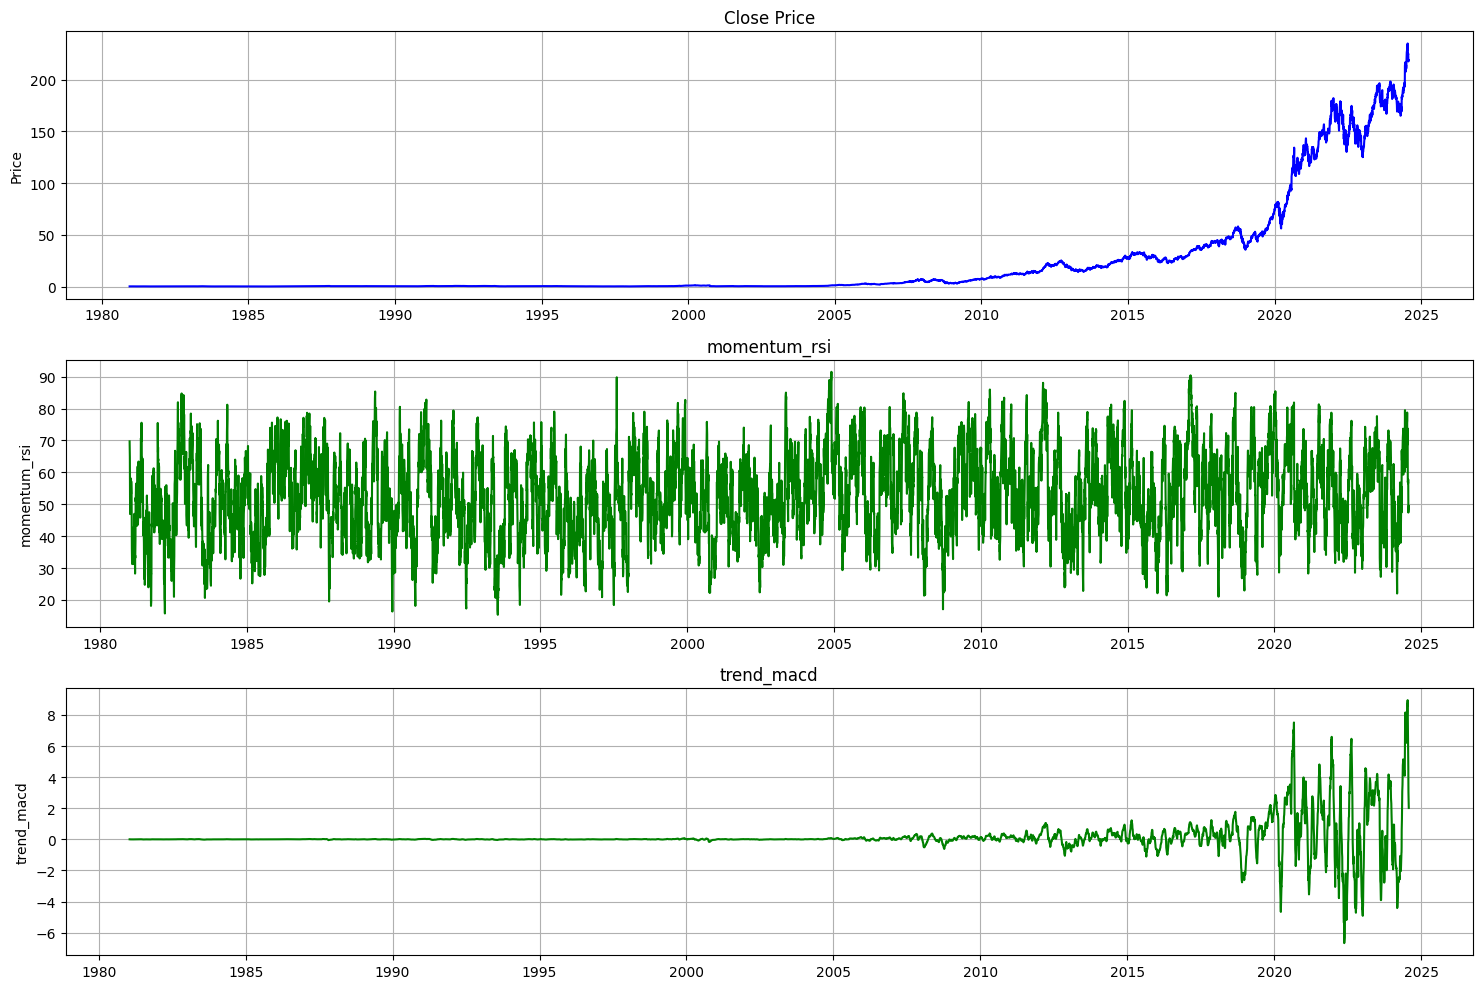

In [385]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()